# Stitch fitted results

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os
from pyxrf.api import stitch_fitted_results

## Define working director

In [6]:
wd = '/Users/Li/Downloads/xrf_data/Feng_Mar2016/'

This working direction should contain multiple folders saving fitted results from different runs. This is the standard output form pyxrf when you select output to txt or tiff.

In [11]:
ls /Users/Li/Downloads/xrf_data/Feng_Mar2016/

output_txt_scan2D_6772/ output_txt_scan2D_6780/ output_txt_scan2D_6788/ output_txt_scan2D_6797/ output_txt_scan2D_6805/ output_txt_scan2D_6813/
output_txt_scan2D_6773/ output_txt_scan2D_6781/ output_txt_scan2D_6789/ output_txt_scan2D_6798/ output_txt_scan2D_6806/ output_txt_scan2D_6814/
output_txt_scan2D_6774/ output_txt_scan2D_6782/ output_txt_scan2D_6790/ output_txt_scan2D_6799/ output_txt_scan2D_6807/ output_txt_scan2D_6815/
output_txt_scan2D_6775/ output_txt_scan2D_6783/ output_txt_scan2D_6791/ output_txt_scan2D_6800/ output_txt_scan2D_6808/ output_txt_scan2D_6820/
output_txt_scan2D_6776/ output_txt_scan2D_6784/ output_txt_scan2D_6792/ output_txt_scan2D_6801/ output_txt_scan2D_6809/ stitched_test/
output_txt_scan2D_6777/ output_txt_scan2D_6785/ output_txt_scan2D_6793/ output_txt_scan2D_6802/ output_txt_scan2D_6810/
output_txt_scan2D_6778/ output_txt_scan2D_6786/ output_txt_scan2D_6794/ output_txt_scan2D_6803/ output_txt_scan2D_6811/
output_txt_scan2D_6779/ output_txt_scan2D_6787/ o

## Select several folders from this working directory, and put them into a list

In [17]:
datalist1 = np.arange(6780, 6786)
datalist2 = np.arange(6790, 6796)
datalist = np.concatenate((datalist1, datalist2))
folderlist = ['output_txt_scan2D_'+str(v) for v in datalist]
print(folderlist)

['output_txt_scan2D_6780', 'output_txt_scan2D_6781', 'output_txt_scan2D_6782', 'output_txt_scan2D_6783', 'output_txt_scan2D_6784', 'output_txt_scan2D_6785', 'output_txt_scan2D_6790', 'output_txt_scan2D_6791', 'output_txt_scan2D_6792', 'output_txt_scan2D_6793', 'output_txt_scan2D_6794', 'output_txt_scan2D_6795']


## Stitch fitted results together

Combine fitted results together from selected folders, and output as a dictionary. We can also
use keyword "output", so the stitched result will be saved to the output folder. Please note that every file in the output folder contains 1D array.

In [18]:
out = stitch_fitted_results(wd, folderlist, output='stitched_test')

In [20]:
out.keys()

['detsum_r_squared',
 'detsum_Ar_K',
 'detsum_Fe_K',
 'detsum_Userpeak1',
 'detsum_Userpeak2',
 'x_pos',
 'detsum_elastic',
 'detsum_compton',
 'detsum_Zn_K',
 'detsum_Co_K',
 'sclr1_ch3',
 'detsum_Si_K',
 'sclr1_ch4',
 'detsum_Ca_K',
 'y_pos',
 'detsum_Ni_K',
 'detsum_Mn_K',
 'detsum_K_K',
 'detsum_Ti_K',
 'detsum_snip_bkg',
 'detsum_S_K',
 'detsum_Al_K',
 'detsum_P_K',
 'detsum_Cr_K',
 'detsum_Cu_K',
 'detsum_Cl_K',
 'detsum_As_K']

## Visualization

x, y positions need to be defined. Use scatter plot from matplotlib

In [21]:
xpos = out['x_pos']
ypos = out['y_pos']
ic = out['sclr1_ch4']
intensity = out['detsum_Cl_K']
intensity /= ic

<IPython.core.display.Javascript object>


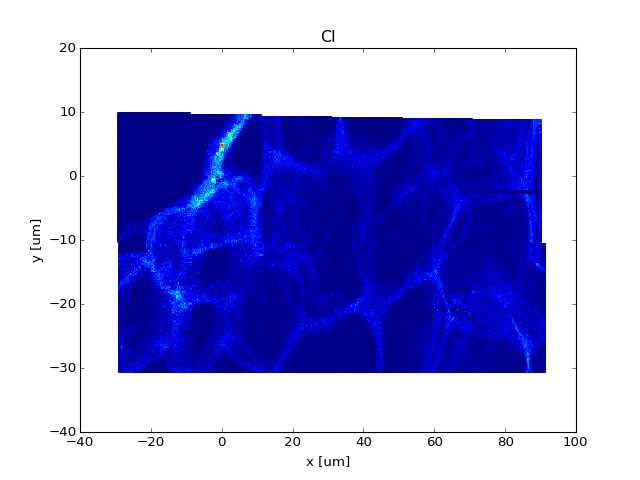

In [26]:
fig, ax = plt.subplots()
ax.scatter(xpos, ypos, c=intensity,
           marker='s', s=10, alpha=0.8, linewidths=1, linewidth=0)
ax.set_xlabel('x [um]')
ax.set_ylabel('y [um]')
ax.set_title('Cl')